<a href="https://colab.research.google.com/github/ia-nechaev/aqm2022/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

When the value of an event is determined by chance, it has an uncertain outcome, this is called ##a random variable##.

Random variables are at the core of probability. There are two kinds of random variables, discrete and continous. 

For example, when I bike to campus, the outcome (i.e., my arrival time) depends on two random values: the amount of wind and red lights.  

Red lights are something we count, a discrete random value. Wind is something we measure, it is a continous random variable.

Random variables can be characterized by,

1.   Central tendency
2.   Variability (or spread)
3. Probability distribution(s)

Today, we will try to familiarize ourselves with central tendency and variability.

Next, we will build on this, and work on probability distributions.





# Example: Airbnb stays by students and faculty

Many people travel and stay in Airbnb rentals. But how many nights do we on average stay in an Airbnb Rental. 

Moreover, while students have a long summer break, do they use this time to travel and stay in Airbnbs? Faculty has less time off, but often travel with the job to conferences and events. 

Now we might some guesses about whether students or faculty stay longer in airbnbs, but we do not have any real answers to these questions. 

Statistics, however, can help. Here, we use a test dataset. But if we collect a real sample, the same principles apply.

## 1. Key terms

In our efforts to start to think like scientists, we gotta practice identifying key terms.  For example, 

We want to know the average (mean) price charged for rentals in Copenhagen by travelors that visit Copenhapgen and stay in an Airbnb. We randomly survey 100 people who stayed in rental units in Copenhagen. Three of the people payed a rental charge of 566kr, 838kr, and 1056kr, respectively.

Please identify:


1.  population
2.  sample
3.  variable
4.  parameter
5.  statistic
6.  data 

## Dataset 1: Length of airbnb stays by **students**
Reported by a sample of 55 students. 

The dataset includes the numbers of night stayed in Airbnb and frequency of students having stayed the number of nights.

In [ ]:
# Load packages used today
import numpy as np #Package for numerical multidimensional tables
import pandas as pd #Package for data frames
import seaborn as sns
import matplotlib.pyplot as plt #Package for plots and graphs
from scipy import stats 
sns.set()

In [ ]:
#Read data
df_s = pd.read_csv('https://raw.githubusercontent.com/ia-nechaev/aqm2022/main/data/airbnb_students.csv')
#df_s

In [ ]:
# some transformations to make it more comfortable to count by hand
df_s_frequency=df_s.groupby('nights')['nights'].count().to_frame()                # counting the quantity of 'nights' entries and converting it to frame
df_s_frequency.rename(columns={'nights':'frequency'}, inplace=True)               # renaming the 'nights' column to 'frequency'
df_s_frequency.insert(1,'c_frequency',df_s_frequency.frequency.cumsum())          # calculate cumulative frequency and inserting it as a new column in a dataframe
df_s_frequency.reset_index(['nights'], inplace=True)                              # reset index, so everything looks nice and tidy

In [ ]:
df_s_frequency


### Determining the location, centrality and spread of the data


Now lets try to play a little around with this data. Together we will calculate some descriptive statistics.

### Percentages
For example, 16 students out of 55 stayed 1 night or less, then f = 16, n = 55 and the relative frequency = f/n = 0.29 or 29% of students. 

### Cumulative frequencies
Lets calculate the cumulative frequencies and append them to the dataframe.


### Classwork
###Median
Let's calculate the median. In general, if there are n results, then the second quartile, the median $$median = \frac{(n + 1)}{2}$$

$$median= \frac{55+1}{2} = 28$$

The 28th result is 2.

###1st quartile

To calculate the first and third quartile, we use the same approach, however, instead of half, we now want quarters, so we do:

$$Q1 =  \frac{(n + 1)}{4}$$

$$Q1 =  \frac{55+1}{4} = 14$$

The 14th result is 1.

###3rd quartile

$$Q3 =  \frac{3(n + 1)}{4}$$

$$Q3 =  \frac{3(56)}{4} = 42$$

The 42th result is 5.

###Interquartile range

$$IQR = Q3 - Q1$$

$$IQR = 5-1 = 4$$

This means that half of the data is arranged 4 nights away from the median.

### Outliers

A value is a potential outlier if it is less than $1.5*IQR$ below $Q1$ or above $Q3$. In our case, no one stayed more than 11 nights $(1.5*4 +5),$ so no potential outlier were detected.

###Mean
To calculate the mean, we add the numbers together and divide the total by the amount of numbers. Mean $$\bar{X} =  \frac{\sum x_i}{n}$$ ($\sum $ = sum of)

$$ \bar{X} =  \frac{(0*5 + 1*11 + 2*12 + 3*11 + 5*8 + 7*5 + 8*3)}{(5 + 11 + 12 + 11 + 8 + 5 + 3)}$$

$$\bar{X}=  \frac{(0 + 11 + 24 + 33 + 40 + 35 + 24)}{55}$$

$$\bar{X}=  \frac{167}{55}$$

$$\bar{X}= 3.0\overline{36}$$

### Mode
The mode is the number which occurs most often in a set of data, so in our case, the mode is 2.

### Standard deviation
To calculate the standard deviation, we start by calculating the sample variance $s^2$. 

$$ s^2=  \frac{\sum (x_i - \bar{X})^2}{n-1}$$

First, we calculate the sum of $$x_i - \bar{X}$$

$$(0-3.0\overline{36}) + (1-3.0\overline{36}) + (2-3.0\overline{36}) + (3-3.0\overline{36}) + (5-3.0\overline{36}) + (7-3.0\overline{36}) + (8-3.0\overline{36}) $$

$$(-3.0\overline{36}) + (-2.04) + (-1.04) + (-0.04) + (1.96) + (3.96) + (4.96) = 4.7\overline{45}$$

We raise to the 2nd the sum of $${[x_i - \bar{X}]}^2$$ .

$$-3.0\overline{36}^2 + -2.04^2 + -1.04^2 + -0.04^2 + 1.96^2 + 3.96^2 + 4.96^2 $$

$$[9.24] + [4.16] + [1.08] + [0.01] + [3.84] + [15.68] +[24.60] =58.6456$$

Then we do  $${[x_i - \bar{X}]}^2 *freq$$

$$[9.24*5] + [4.16*11] + [1.08*12] + [0.01*11] + [3.84*8] + [15.68*5] + [24.60*3] = 287.9\overline{27}$$

We plug the values into the equestion to find the standard deviations:

$$s =\sqrt{\frac{287.9\overline{27}}{55-1}}$$


Standard Deviation is equal to the square root of the variance: $$s = 2.309$$

## Dataset 2: Length of airbnb stays by **faculty**

Reported by a sample of 55 faculty staff. The dataset includes the numbers of night stayed in Airbnb and frequency of faculty having stayed the number of nights.

In [ ]:
#Show dataset
df_f = pd.read_csv('https://raw.githubusercontent.com/ia-nechaev/aqm2022/main/data/airbnb_faculty.csv')
#df_f

In [ ]:
# some transformations to make it more comfortable to count by hand
df_f_frequency=df_f.groupby('nights')['nights'].count().to_frame()                # counting the quantity of 'nights' entries and converting it to frame
df_f_frequency.rename(columns={'nights':'frequency'}, inplace=True)               # renaming the 'nights' column to 'frequency'
df_f_frequency.insert(1,'c_frequency',df_f_frequency.frequency.cumsum())          # calculate cumulative frequency and inserting it as a new column in a dataframe
df_f_frequency.reset_index(['nights'], inplace=True)                              # reset index, so everything looks nice and tidy

In [ ]:
df_f_frequency

As mentioned in the lecture, we compute some measurements of the data that allow us to make better decisions. For example, computing a *representative* number for students' airbnb stay, but when we want to compare this against the analogous *representative* number for faculty. How would we do this?

We use the same measures as we just used. This allows us to tests between samples to compare their *central tendencies*. That is, how an airbnb stay in *the middle* of lengths of stays compares between the two groups. 

But in order to do so, you have to do a bit of work.



### Determining the location, centrality and spread of the data 


### Your turn!


**Median**

**1st Quartile**

**3rd Quantile**

**Interquartile range**

**Outliers**

**Mean**

**Mode**

**Standard Deviation**


Despite showing the nightly stays reported by 55 students and 55 faculty, the statistics look quite different.

Where do you see the main differences? What do you think they mean? Anything you need to consider?

# Python exercises

## Checking airbnb_students descriptive statistics

In [ ]:
###Median
df_s['nights'].median()

In [ ]:
###Mean
mean=df_s['nights'].mean()
mean

In [ ]:
###Mode
df_s['nights'].mode()

In [ ]:
###Standard Deviation
std=df_s['nights'].std()
std

In [ ]:
###1st Quartile
Q1=np.quantile(df_s['nights'], 0.25)
Q1

In [ ]:
###3rd Quantile
Q3=np.quantile(df_s['nights'], 0.75)
Q3

In [ ]:
###Interquartile range
#stats.iqr(df_s['nights'])
IQR=Q3-Q1
IQR

### Outliers (interquartile range)

In [ ]:
###Outliers based on interquartile range
upper_boundary=Q3+1.5*IQR
upper_boundary

In [ ]:
lower_boundary=Q1-1.5*IQR
lower_boundary

### Outliers (standard deviation)

In [ ]:
###Outliers based on standard deviation
upper_boundary=mean+3*std
upper_boundary

In [ ]:
lower_boundary=mean-3*std
lower_boundary

### Boxplot refresher

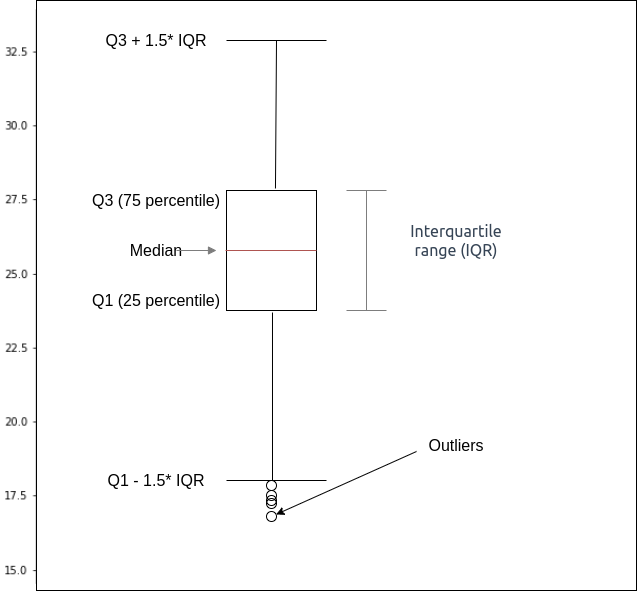

In [ ]:
plt.boxplot(df_s['nights'])
plt.show()

In [ ]:
df_s.hist()

[Hist function documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html)

## Checking airbnb_faculty descriptive statistics

In [ ]:
###Mean
###1st Quartile
###3rd Quantile
###Standard Deviation

###Median
###Mode
###Interquartile range
###Outliers
###Boxplot
###Histogram

In [ ]:
# First 4 questions in one function

In [ ]:
print('Median: ')
print('Mode: ')
print('IQR: ')

In [ ]:
# Outliers IQR
upper_boundary
upper_boundary

In [ ]:
lower_boundary
lower_boundary

In [ ]:
#Check the outliers


In [ ]:
#boxplot
plt.show()

In [ ]:
#histogram

## Dataset 3: Treadmills

### Loading dataset and descriptive statistics

In [ ]:
mydata = pd.read_csv('https://raw.githubusercontent.com/ia-nechaev/aqm2022/main/data/CardioGoodFitness.csv')

In [ ]:
mydata.info()

In [ ]:
mydata.columns

In [ ]:
# Let's describe mydata


In [ ]:
# Which model sells best?
mydata.Product.value_counts()

In [ ]:
# Who buys treadmills more: men or women?

In [ ]:
plt.scatter(mydata.Age,mydata.Income)

In [ ]:
mydata.hist(figsize=(10,10))

In [ ]:
sns.displot(mydata['Age'])

In [ ]:
plt.boxplot(mydata.Age)
plt.show()

### Removing the Age outliers and comparing decriptive statistics

In [ ]:
# STD
ub=
lb=
mydata_ro_std=mydata[(mydata['Age']>lb)&(mydata['Age']<ub)]

In [ ]:
# IQR
ub=
lb=
mydata_ro_iqr=mydata[(mydata['Age']>lb)&(mydata['Age']<ub)]

In [ ]:
# Checking how many datapoints we sliced out:
print('Initial ds shape: ', mydata.shape, end='\n')
print('STD sliced ds shape: ', mydata_ro_std.shape, end='\n')
print('IQR sliced ds shape: ', mydata_ro_iqr.shape, end='\n')

In [ ]:
# Compairing boxplots of datasets
data = [mydata.Age, mydata_ro_std.Age, mydata_ro_iqr.Age]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()